In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.svm import SVC

In [60]:
cancer = load_breast_cancer()
df_origin = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_origin['target'] = cancer.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_origin.drop('target',axis=1), df_origin['target'], test_size=0.2)

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

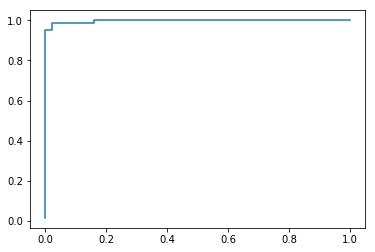

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.show()

In [69]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.996875

In [67]:
svc = SVC(kernel='linear', random_state=None, probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

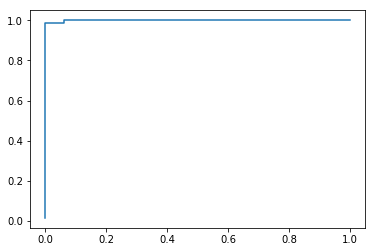

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.show()

In [70]:
roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])

0.9990625